# <center> Netflix EDA, Visualization & Recommendation</center> 

<div class="alert alert-block alert-info"> Please Upvote ✌ if you like the notebook and share possible improvements in the comments.</div>

##  <div class="alert alert-block alert-info"> Netflix, Inc. is an American content platform and production company headquartered in Los Gatos, California. Netflix was founded in 1997 by Reed Hastings and Marc Randolph in Scotts Valley, California.</div>

##  <div class="alert alert-block alert-info"> Problem Statement</div>

**Problem Statement
Some of the interesting questions (tasks) which can be performed on this dataset**

* Understanding what content is available in different countries
* Identifying similar content by matching text-based features
* Network analysis of Actors / Directors and find interesting insights
* Is Netflix has increasingly focusing on TV rather than movies in recent years.

##  <div class="alert alert-block alert-info"> About Dataset </div> 

**netflix_titles.csv: The csv file contains information about the various movies and the data related to them:**

* Show ID - unique ID of that particular show
* Type - type of the video - movie, TV Series etc.
* Title - title of the video
* Director - director name
* Cast - cast members
* Country - country where it was released
* Data Added - date when it became live on NETFLIX
* Release Year - year of release
* Rating - user rating
* Duration - duration of the movie, TV Series etc.
* Listed in - Genre information
* Description - concise plot of the series


##  <div class="alert alert-block alert-info"> <center> 1. Importing Required Libraries </center><div>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Missingno is a Python library that provides the ability to understand the distribution of missing values through informative visualizations. ... With this library
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

##  <div class="alert alert-block alert-info"> <center> 2. Preprocessing </center><div>

In [ ]:
df=pd.read_csv('../input/netflix-shows/netflix_titles.csv')
df.head()

In [ ]:
df.info()

In [ ]:
df.describe().T

### Stats of dataset using Pandas Profiling
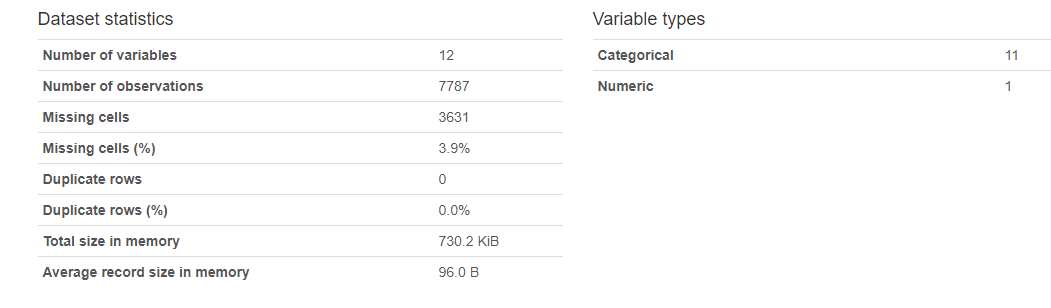

In [ ]:
# Visualizing Missing Values
msno.matrix(df)

#### Observation
From the above visualisation we can observe that "director" has a peculiar pattern that stands out."cast" and "country" have a similar pattern of missing values while column "date_added" shows a different pattern.

In [ ]:
df.isnull().sum()

#### Observation
it's better to Drop 'director' & 'cast' columns because its Contains Null Values and not needed for Analysis.        

In [ ]:
msno.bar(df)

In [ ]:
for i in df.columns:
    null_rate=df[i].isnull().sum()/len(df)*100
    if null_rate>0 :
        print("{} 's null rate:{}%".format(i,round(null_rate,2)))

**Observation**: As per our earlier analysis, we can see that the 'director' column has the highest whereas 'rating' column has the lowest number of missing values!


In [ ]:
df.nunique()

In [ ]:
Null_rating=df[df['rating'].isnull()]
Null_rating.style.highlight_null(null_color='red')

In [ ]:
rating_replacements = {
    67: 'TV-PG',
    2359: 'TV-14',
    3660: 'TV-MA',
    3736: 'TV-MA',
    3737: 'NR',
    3738: 'TV-MA',
    4323: 'TV-MA '
}
for id, rate in rating_replacements.items():
    df.iloc[id,8]=rate
df['rating'].isnull().sum()

**All the missing values in the ratings column has been fixed!**

In [ ]:
df.drop(['director', 'cast'], inplace=True, axis=1)
df.columns

In [ ]:
df=df[df["date_added"].notna()]

In [ ]:
df.isnull().sum()

**We have null values left only in the 'country' column. Let's try to fix it with the value which occurs the most number of times i.e. MODE**

In [ ]:
df['country']=df['country'].fillna(df['country'].mode()[0])
df['country'].isnull().sum()

In [ ]:
df['country'].nunique()

**In Country column there are some entry where it has multiple values. so we will add a new column with just the first one so we can check which regions have more productions**

In [ ]:
df['principal_country']=df['country'].apply(lambda x: x.split(",")[0])
df['principal_country'].head()

In [ ]:
df['principal_country'].nunique()

In [ ]:
df.isna().sum()

**WOW** we fixed all the Null Values in datset

In [ ]:
df.dtypes

In [ ]:
df['year_added'] = df['date_added'].apply(lambda x: x.split(" ")[-1])
df['year_added'].head()

In [ ]:
df['month_added'] = df['date_added'].apply(lambda x: x.split(" ")[0])
df['month_added'].head()

In [ ]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

In [ ]:
df['target_ages'] = df['rating'].replace(ratings_ages)
df['target_ages'].unique()

##  <div class="alert alert-block alert-info"> <center> 3. Data Visualization </center><div>

In [ ]:
plt.figure(figsize=(10, 6), dpi=80)
sns.set_theme(style="darkgrid")
ax = sns.countplot(x='type', data=df)
plt.title('MOVIES VS TV_SHOWS')
plt.xlabel('TYPES')
plt.ylabel('COUNT')
plt.show()

**Observation**: There are almost half the number of TV Shows than there are Movies on Netflix

In [ ]:
df['type'] = pd.Categorical(df['type'])

# target_ages is another category (4 classes)
df['target_ages'] = pd.Categorical(df['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

# Year added should be integer so we can compare with `released_year`
df['year_added'] = pd.to_numeric(df['year_added'])

In [ ]:
plt.figure(figsize=(15,8))
label=['TV Show', 'Movie']
plt.pie(df['type'].value_counts().sort_values(), labels=label, explode=[0.15,0.15], 
        autopct='%1.2f%%', startangle=90)
plt.title('Different Types of Netflix Content')
plt.axis('equal')

In [ ]:
df_movie = df[df['type']=='Movie'].groupby('release_year').count()
df_tv = df[df['type']=='TV Show'].groupby('release_year').count()


df_movie.reset_index(level=0, inplace=True)
df_tv.reset_index(level=0, inplace=True)
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_movie['release_year'], y=df_movie['show_id'],
                    mode='lines',
                    name='Movies', marker_color='mediumpurple'))
fig.add_trace(go.Scatter(x=df_tv['release_year'], y=df_tv['show_id'],
                    mode='lines',
                    name='TV Shows', marker_color='lightcoral'))
fig.update_layout(title_text='Trend Movies vs TV Shows in recent years', title_x=0.5)
fig.show()

In [ ]:
def generate_rating_df(df):
    rating_df = df.groupby(['rating', 'target_ages']).agg({'show_id': 'count'}).reset_index()
    rating_df = rating_df[rating_df['show_id'] != 0]
    rating_df.columns = ['rating', 'target_ages', 'counts']
    rating_df = rating_df.sort_values('target_ages')
    return rating_df


rating_df = generate_rating_df(df)
fig = px.bar(rating_df, x='rating', y='counts', color='target_ages', title='Ratings of Movies And TV Shows Based On Target Age Groups',  labels={'counts':'COUNT', 'rating':'RATINGS', 'target_ages':'TARGET AGE GROUPS' })
fig.show()

In [ ]:
df_tv = df[df["type"] == "TV Show"]
df_movie = df[df["type"] == "Movie"]

movie_ratings = df_movie.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (18,8)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=movie_ratings)
plt.title('Top Movie Ratings Based On Rating System',size='20')
plt.show()

In [ ]:
tv_ratings = df_tv.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (18,8)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('Top TV Show Ratings Based On Rating System',size='20')
plt.show()

In [ ]:
plt.figure(figsize=(12,10))
sns.set(style="whitegrid")
ax = sns.countplot(y="release_year", data=df_movie, palette="coolwarm", order=df_movie['release_year'].value_counts().index[0:15])

plt.title('ANALYSIS ON RELEASE YEAR OF MOVIES', fontsize=15, fontweight='bold')
plt.show()

In [ ]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=df_tv, palette="coolwarm", order=df_tv['release_year'].value_counts().index[0:15])

plt.title('ANALYSIS ON RELEASE YEAR OF TV Show', fontsize=15, fontweight='bold')
plt.show()

In [ ]:
from collections import Counter
country_data = df['country']
country_count = pd.Series(dict(Counter(','.join(country_data).replace(' ,',',').replace(
    ', ',',').split(',')))).sort_values(ascending=False)
top20country = country_count.head(20)
plt.figure(figsize=(15,5))
sns.barplot(x= top20country.index, y=top20country, palette="pastel")
plt.xticks(rotation=50)
plt.title('Top 20 countries with most contents', fontsize=15, fontweight='bold')
plt.show()

In [ ]:
rating_order_movie =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
rating_order_tv =  [ 'TV-Y', 'TV-G', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'TV-14', 'R', 'TV-MA']
movie_rating = df_movie['rating'].value_counts()[rating_order_movie]
tv_rating = df_tv['rating'].value_counts()[rating_order_tv].fillna(0)
def rating_barplot(data, title, height, h_lim=None):
    fig, ax = plt.subplots(1,1, figsize=(15, 7))
    if h_lim :
        ax.set_ylim(0, h_lim)
    ax.bar(data.index, data,  color="#d0d0d0", width=0.6, edgecolor='black')

    color =  ['green',  'blue',  'orange',  'red']
    span_range = [[0, 2], [3,  6], [7, 8], [9, 11]]

    for idx, sub_title in enumerate(['Little Kids', 'Older Kids', 'Teens', 'Mature']):
        ax.annotate(sub_title,
                    xy=(sum(span_range[idx])/2 ,height),
                    xytext=(0,0), textcoords='offset points',
                    va="center", ha="center",
                    color="w", fontsize=16, fontweight='bold',
                    bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
        ax.axvspan(span_range[idx][0]-0.4,span_range[idx][1]+0.4,  color=color[idx], alpha=0.1)

    ax.set_title(f'Distribution of {title} Rating', fontsize=20, fontweight='bold', position=(0.5, 1.0+0.03))
    plt.show()
    

rating_barplot(movie_rating,'Movie', 1500)

In [ ]:
rating_barplot(tv_rating,'TV Show' , 600, 1500)

In [ ]:
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(df_movie['listed_in'])

plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'black',colormap='vlag', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(df_tv['listed_in'])

plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'lightblue', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**For finding Top rated movies, we are adding one more dataset "imdb-extensive-dataset". We will join this with Netflix data and display the top rated movies by matching the "Title" in both data sets.**



In [ ]:
imdb_movie_names = pd.read_csv('../input/imdb-extensive-dataset/IMDb movies.csv',
                               usecols=['title', 'year', 'avg_vote'])

new_ratings = pd.DataFrame({'Title':imdb_movie_names.title,
                    'Rating': imdb_movie_names.avg_vote,
                           'Year' : imdb_movie_names.year})

new_ratings.drop_duplicates(subset=['Title','Year','Rating'], inplace=True)
print(new_ratings.shape)
new_ratings.head(5)

In [ ]:
Inner_join_data = new_ratings.merge(df,left_on='Title', right_on='title', how='inner')
Inner_join_data=Inner_join_data.sort_values(by='Rating', ascending=False)

In [ ]:
top_rated=Inner_join_data[0:15]
fig =px.sunburst(
    top_rated,
    path=['title','country'],
    values='Rating',
    color='Rating')
fig.show()

In [ ]:
countries_data = Inner_join_data['country'].value_counts().sort_values(ascending=False)
country_count = pd.DataFrame(countries_data)
Top_countries = country_count.head(15)
Visualization = px.bar(Top_countries, title = "Countries with highest rated content")
Visualization.show()

In [ ]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Visualization using Choropleth

df = df['country'].value_counts()

iplot([go.Choropleth(
    locationmode='country names',
    locations=df.index.values,
    text=df.index,
    z=df.values,
)])

<div class="alert alert-block alert-info"> Please Upvote ✌ if you like the notebook and share possible improvements in the comments.</div>